In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)



data = pd.read_csv("D:\Machine Learning\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


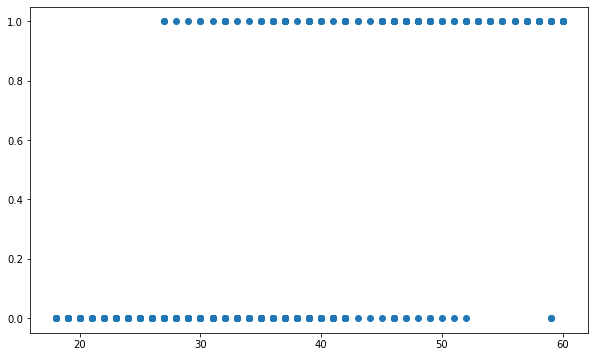

In [5]:

plt.scatter(data['Age'], data['Purchased'])
plt.show()


xTrain, xTest, yTrain, yTest = train_test_split(data['Age'], data['Purchased'], test_size=0.20)

In [10]:

def normalize(X):
    return X - X.mean()

def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

def logisticRegression(X, Y):

    X = normalize(X)


    b0 = 0
    b1 = 0
    L = 0.0001
    epochs = 300

    for epoch in range(epochs):
        yPred = predict(X, b0, b1)
        dB0 = -2 * sum((Y - yPred) * yPred * (1 - yPred))  
        dB1 = -2 * sum(X * (Y - yPred) * yPred * (1 - yPred))  
        b0 = b0 - L * dB0
        b1 = b1 - L * dB1
    
    return b0, b1

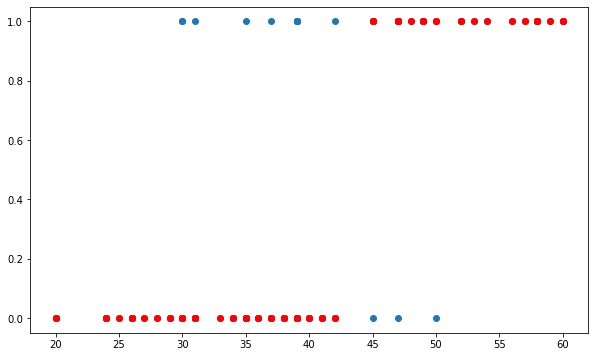

Accuracy = 0.8375


In [11]:
# Training the model
b0, b1 = logisticRegression(xTrain, yTrain)

# Making predictions
xTestNorm = normalize(xTest)
yPred = predict(xTestNorm, b0, b1)
yPred = [1 if p >= 0.5 else 0 for p in yPred]

plt.clf()
plt.scatter(xTest, yTest)
plt.scatter(xTest, yPred, c="red")
plt.show()

accuracy = 0
for i in range(len(yPred)):
    if yPred[i] == yTest.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(yPred)}")
